##Próxima etapa - melhoria (Natalia)

Verificar a probabilidade a partir da doença (coluna major health issue).
Com isso, pegar a frase que cita a doença do grupo OMS e comparar com a frase que cita a doença do grupo sem OMS.

##Proxima etapa- sugestao minha

fazer a comparação contando frases de duas , tres , quatro e cinco palavras

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [ ]:
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
sns.set()

In [ ]:
GRUPO_NAO = pd.read_excel('/content/mydrive/MyDrive/GRUPO_NAO.xlsx')
GRUPO_NAO

,Data,Tipo,Número,Doc ID,Origem,Conteudo,Major Health Topics,OMS,PROBABILIDADE_OMS,RESULTADO_OMS,PROBABILIDADE,RESULTADO,Data_SIM,Major Health Topics_SIM,tipo_SIM
0,2020-04-13,Ext,1614,15342829868,stf,Documento assinado digitalmente conforme MP n°...,COVID-19,não,0,0,0.71,4,2020-04-03,COVID-19,ADPF
1,2020-10-28,HC,193322,15344810163,stf,Documento assinado digitalmente conforme MP n°...,COVID-19,não,0,0,0.80,7,2020-10-07,COVID-19,HC
2,2020-10-28,RHC,192375,15344822841,stf,Documento assinado digitalmente conforme MP n°...,COVID-19,não,0,0,0.75,7,2020-10-07,COVID-19,HC
3,2020-10-29,RHC,192375,15344822841,stf,Documento assinado digitalmente conforme MP n°...,COVID-19,não,0,0,0.75,7,2020-10-07,COVID-19,HC
4,2021-07-12,MS,38042,15347038096,stf,MEDIDA CAUTELAR EM MANDADO DE SEGURANÇA 38.042...,COVID-19,não,0,0,0.79,45,2021-07-07,COVID-19,MS
5,2021-07-20,MS,38070,15347088175,stf,MEDIDA CAUTELAR EM MANDADO DE SEGURANÇA 38.070...,COVID-19,não,0,0,0.75,45,2021-07-07,COVID-19,MS
6,2021-08-27,MS,38187,15347487911,stf,MEDIDA CAUTELAR EM MANDADO DE SEGURANÇA 38.187...,COVID-19,não,0,0,0.74,45,2021-07-07,COVID-19,MS
7,2016-05-09,ARE,733577,309396844,stf,RECURSO EXTRAORDINÁRIO COM AGRAVO 733.577 DIST...,Governança de Sáude Pública_Health system gove...,não,0,0,0.94,48,2016-05-05,Governança de Sáude Pública_Health system gove...,ARE


In [ ]:
GRUPO_NAO_novo = pd.read_excel('/content/mydrive/MyDrive/GRUPO_NAO_novo.xlsx')
GRUPO_NAO_novo

,Data,Tipo,Número,Doc ID,Origem,Conteudo,Major Health Topics,OMS,PROBABILIDADE_OMS,RESULTADO_OMS,PROBABILIDADE,RESULTADO,Data_SIM,Major Health Topics_SIM,Conteudo_SIM,tipo_SIM
0,2020-04-13,Ext,1614,15342829868,stf,Documento assinado digitalmente conforme MP n°...,COVID-19,não,0,0,0.71,4,2020-04-03,COVID-19,Documento assinado digitalmente conforme MP n°...,ADPF
1,2020-10-28,HC,193322,15344810163,stf,Documento assinado digitalmente conforme MP n°...,COVID-19,não,0,0,0.80,7,2020-10-07,COVID-19,HABEAS CORPUS 192.269 SÃO PAULO\n\nRELATOR : M...,HC
2,2020-10-28,RHC,192375,15344822841,stf,Documento assinado digitalmente conforme MP n°...,COVID-19,não,0,0,0.75,7,2020-10-07,COVID-19,HABEAS CORPUS 192.269 SÃO PAULO\n\nRELATOR : M...,HC
3,2020-10-29,RHC,192375,15344822841,stf,Documento assinado digitalmente conforme MP n°...,COVID-19,não,0,0,0.75,7,2020-10-07,COVID-19,HABEAS CORPUS 192.269 SÃO PAULO\n\nRELATOR : M...,HC
4,2021-07-12,MS,38042,15347038096,stf,MEDIDA CAUTELAR EM MANDADO DE SEGURANÇA 38.042...,COVID-19,não,0,0,0.79,45,2021-07-07,COVID-19,MEDIDA CAUTELAR EM MANDADO DE SEGURANÇA 38.040...,MS
5,2021-07-20,MS,38070,15347088175,stf,MEDIDA CAUTELAR EM MANDADO DE SEGURANÇA 38.070...,COVID-19,não,0,0,0.75,45,2021-07-07,COVID-19,MEDIDA CAUTELAR EM MANDADO DE SEGURANÇA 38.040...,MS
6,2021-08-27,MS,38187,15347487911,stf,MEDIDA CAUTELAR EM MANDADO DE SEGURANÇA 38.187...,COVID-19,não,0,0,0.74,45,2021-07-07,COVID-19,MEDIDA CAUTELAR EM MANDADO DE SEGURANÇA 38.040...,MS
7,2016-05-09,ARE,733577,309396844,stf,RECURSO EXTRAORDINÁRIO COM AGRAVO 733.577 DIST...,Governança de Sáude Pública_Health system gove...,não,0,0,0.94,48,2016-05-05,Governança de Sáude Pública_Health system gove...,RECURSO EXTRAORDINÁRIO COM AGRAVO 749.016 RIO ...,ARE


In [ ]:
# Definindo o estilo CSS para o título
css_style = """
<style>
    .color-title {
        color: RED; /* Escolha a cor desejada */
    }
</style>
"""

# Definindo o título com a classe de estilo
titulo = "<h1 class='color-title'> ESTATISTICA </h1>"

# Exibindo o título com o estilo CSS
from IPython.display import HTML
HTML(css_style + titulo)

#DISTRIBUIÇÃO DO TIPO_SIM(ORIGEM)

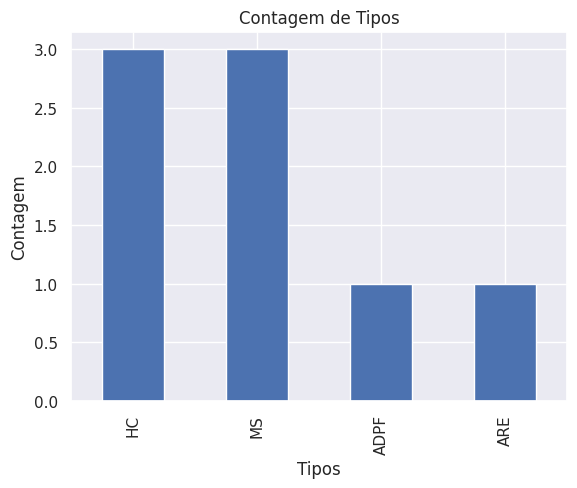

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Contagem dos tipos na coluna 'tipos'
contagem_tipos = GRUPO_NAO['tipo_SIM'].value_counts()

# Plotar o gráfico de barras
contagem_tipos.plot(kind='bar')
plt.xlabel('Tipos')
plt.ylabel('Contagem')
plt.title('Contagem de Tipos')
plt.show()

#DISTRIBUIÇÃO Major Health Topics_SIM

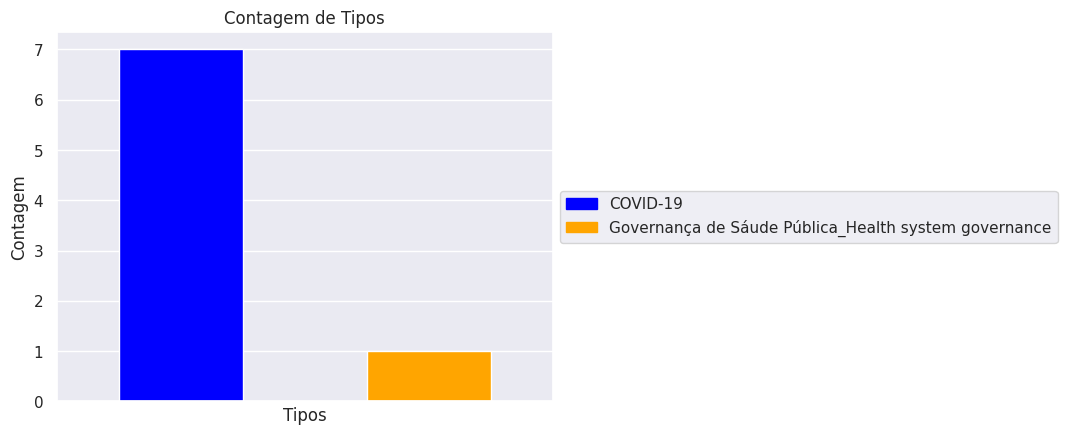

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'GRUPOS' seja seu DataFrame
# Contagem dos tipos na coluna 'Major Health Topics_SIM'
contagem_tipos = GRUPO_NAO['Major Health Topics_SIM'].value_counts()

# Definir cores diferentes para cada categoria
cores = ['blue', 'orange', 'green', 'red', 'purple']  # Você pode ajustar as cores conforme necessário

# Plotar o gráfico de barras
grafico = contagem_tipos.plot(kind='bar', color=cores)

# Adicionar legenda com as cores
legenda = [plt.Rectangle((0,0),1,1, color=cores[i], edgecolor=None) for i in range(len(contagem_tipos))]
plt.legend(legenda, contagem_tipos.index, loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Tipos') # Remover rótulo do eixo x
plt.ylabel('Contagem')
plt.title('Contagem de Tipos')
plt.xticks([]) # Remover rótulos do eixo x

plt.show()

#DISTRIBUIÇÃO DO TIPO(DESTINO)

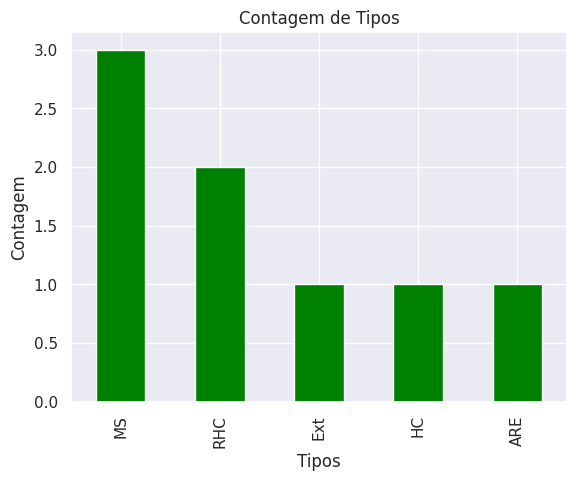

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Contagem dos tipos na coluna 'tipos'
contagem_tipos = GRUPO_NAO['Tipo'].value_counts()

# Plotar o gráfico de barras
contagem_tipos.plot(kind='bar',color='green')
plt.xlabel('Tipos')
plt.ylabel('Contagem')
plt.title('Contagem de Tipos')
plt.show()

#distribuição de Major Health Topics

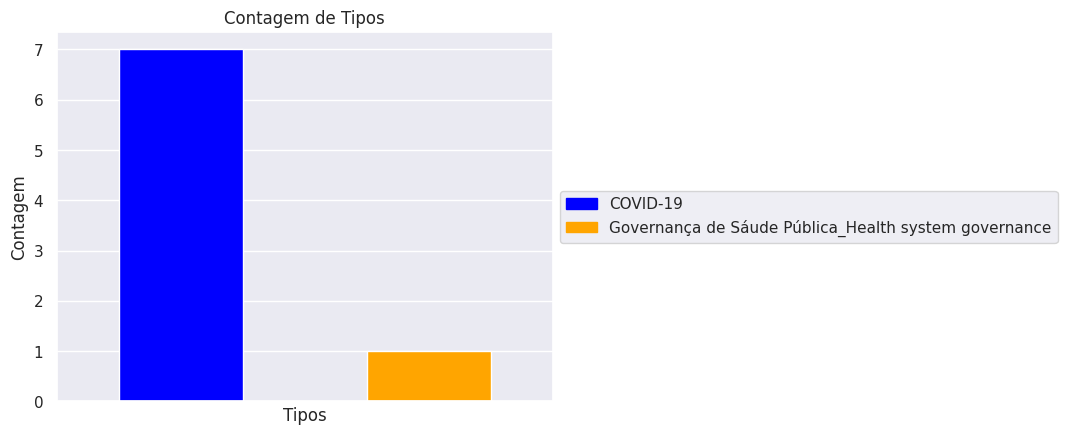

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'GRUPOS' seja seu DataFrame
# Contagem dos tipos na coluna 'Major Health Topics_SIM'
contagem_tipos = GRUPO_NAO['Major Health Topics'].value_counts()

# Definir cores diferentes para cada categoria
cores = ['blue', 'orange', 'green', 'red', 'purple']  # Você pode ajustar as cores conforme necessário

# Plotar o gráfico de barras
grafico = contagem_tipos.plot(kind='bar', color=cores)

# Adicionar legenda com as cores
legenda = [plt.Rectangle((0,0),1,1, color=cores[i], edgecolor=None) for i in range(len(contagem_tipos))]
plt.legend(legenda, contagem_tipos.index, loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Tipos') # Remover rótulo do eixo x
plt.ylabel('Contagem')
plt.title('Contagem de Tipos')
plt.xticks([]) # Remover rótulos do eixo x

plt.show()

In [ ]:
# Definindo o estilo CSS para o título
css_style = """
<style>
    .color-title {
        color: RED; /* Escolha a cor desejada */
    }
</style>
"""

# Definindo o título com a classe de estilo
titulo = "<h1 class='color-title'> REDES </h1>"

# Exibindo o título com o estilo CSS
from IPython.display import HTML
HTML(css_style + titulo)

In [ ]:
GRUPO_NAO = pd.read_excel('/content/mydrive/MyDrive/GRUPO_NAO.xlsx')


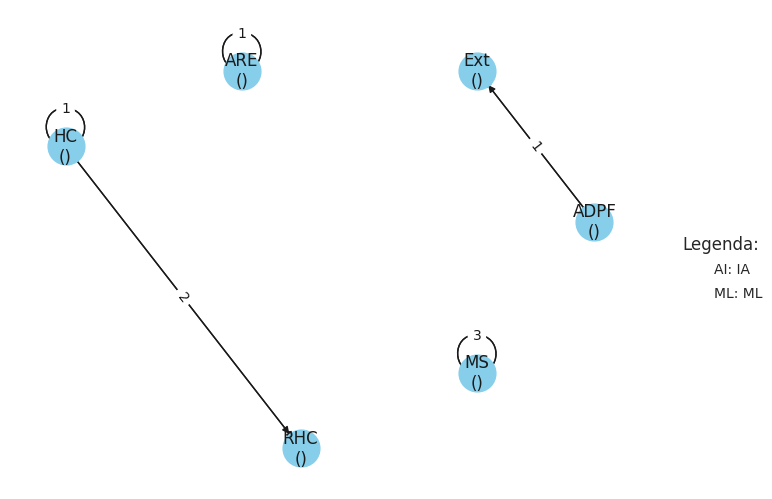

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Criando um dicionário de legendas
legendas = {
    'AI': 'IA',
    'ML':'ML' ,
    # Adicione outros tipos conforme necessário
}

# Criando um objeto de grafo direcionado
G = nx.DiGraph()

# Calculando a ponderação (substitua GRUPOS pelo seu DataFrame real)
ponderacao = GRUPO_NAO.groupby(['tipo_SIM', 'Tipo']).size().reset_index(name='Ponderacao')

# Adicionando arestas com suas ponderações
for origem, destino, ponderacao in ponderacao.values:
    G.add_edge(origem, destino, weight=ponderacao)

# Ajustando o layout dos nós para garantir que estejam separados
pos = nx.kamada_kawai_layout(G)

# Desenhando os nós sem rótulos
nx.draw(G, pos, node_size=700, node_color="skyblue", font_size=20, font_weight="bold", with_labels=False)

# Desenhando as arestas com setas
nx.draw_networkx_edges(G, pos, arrows=True)

# Adicionando as legendas dos nós
legendas_nos = {node: f"{node}\n({legendas.get(node, '')})" for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=legendas_nos)

# Adicionando as ponderações das arestas
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Adicionando legendas explicativas na lateral
plt.text(1.05, 0.5, 'Legenda:', fontsize=12, transform=plt.gca().transAxes)
for i, (codigo, nome) in enumerate(legendas.items()):
    plt.text(1.1, 0.45 - i * 0.05, f'{codigo}: {nome}', fontsize=10, transform=plt.gca().transAxes)

# Mostrando o gráfico
plt.show()